In [1]:
%load_ext autoreload
%autoreload 2
# %reload_ext autoreload

In [2]:
import os
# os.chdir("..")
os.chdir('/tmp2/ivy8792/deepsvg_reproduce')

# print(os.getcwd())

In [3]:
from deepsvg.svglib.geom import Point, Angle
from deepsvg.svglib.svg import SVG
from deepsvg.svglib.utils import make_grid

# SVGLib walk-through

## Loading & displaying

In [16]:
# dolphin = SVG.load_svg("docs/imgs/rain_outline.svg")  # rain_outline.svg, ocean_color.svg
dolphin = SVG.load_svg('svgs/037-time.svg')

path [('id', 'Path'), ('d', 'm36.25 6h-28.25c-4.418278 0-8 3.581722-8 8v24c0 4.418278 3.581722 8 8 8h4c.5522847 0 1 .4477153 1 1v8c-.0000257.390353.2270897.7450391.5816401.9083471.3545504.1633081.7717173.1053824 1.0683599-.1483471l11.07-9.52c.1796813-.1573781.4111588-.2428467.65-.24h19.63c4.418278 0 8-3.581722 8-8v-16.049z'), ('fill', '#b0d3f0')]
path [('id', 'Path'), ('d', 'm46 43c-.5522847 0-1-.4477153-1-1s.4477153-1 1-1c1.6568542 0 3-1.3431458 3-3 0-.5522847.4477153-1 1-1s1 .4477153 1 1c-.0033061 2.7600532-2.2399468 4.9966939-5 5z'), ('fill', '#90bae1')]
path [('id', 'Path'), ('d', 'm4 15c-.55228475 0-1-.4477153-1-1 .00330612-2.7600532 2.23994685-4.99669388 5-5 .55228475 0 1 .44771525 1 1 0 .5522847-.44771525 1-1 1-1.65685425 0-3 1.3431458-3 3 0 .5522847-.44771525 1-1 1z'), ('fill', '#ecf0f1')]
path [('id', 'Path'), ('d', 'm58 13c-.0022 5.2675336-3.4407227 9.9172531-8.4765507 11.4623591-5.0358279 1.545106-10.4904292-.3760018-13.4465313-4.7358614s-2.7218902-10.13813567.5773726-14.244

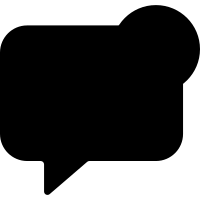

In [17]:
dolphin.draw()

For proper displaying, SVGlib expects SVGs to be drawn in a normalized viewbox of size 24x24. Stroke-width will appear to thin if a larger viewbox is used and too thick if the viewbox is too small.

In [18]:
print(dolphin.viewbox)

Bbox(0.0 0.0 59.0 56.0)


You can **normalize** an SVG with the `normalize` method which will properly scale the points to fit a 24x24 window.

Bbox(0.0 0.0 24.0 24.0)


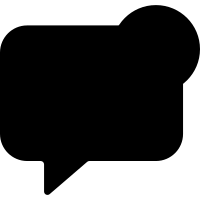

In [19]:
dolphin.normalize()
print(dolphin.viewbox)
dolphin.draw()

The `with_points` option lets you display the individual points of the path:

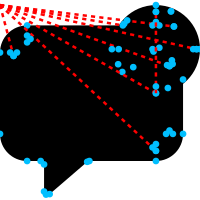

In [20]:
dolphin.draw(with_points=True)

Let us "unzoom" a little, so that there is a little more free room on the borders of the image.

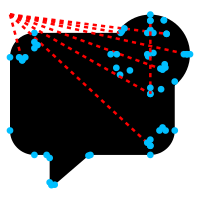

In [21]:
dolphin.zoom(0.9).draw(with_points=True)

For easier training of DeepSVG, the following "canonicalization" strategy is used:
- an SVG path is oriented clockwise and starts from the topmost-leftmost point.
- the path is simplified, so that points lie at approximately equal distance between each other.

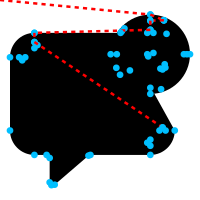

In [13]:
dolphin.canonicalize().draw(with_points=True)

Our simplification heuristic uses a combination of Ramer-Douglas-Peucker and Philip J. Schneider algorithms.

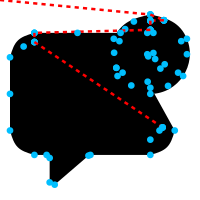

In [14]:
dolphin.simplify_heuristic().draw(with_points=True)

Finally, generating a GIF from the drawing is as easy as:

In [27]:
dolphin.animate(frame_duration=0.1)

SVGPath(M[P(1.2000007629394531, 1.7491531372070312), P(14.471186637878418, 3.94576358795166)] L[P(14.471186637878418, 3.94576358795166), P(4.128813743591309, 3.94576358795166)] C[P(4.128813743591309, 3.94576358795166), P(2.511275291442871, 3.94576358795166), P(1.2000007629394531, 5.25703763961792), P(1.2000007629394531, 6.874576568603516)] L[P(1.2000007629394531, 6.874576568603516), P(1.2000007629394531, 15.661016464233398)] C[P(1.2000007629394531, 15.661016464233398), P(1.2000007629394531, 17.27855682373047), P(2.511275291442871, 18.589828491210938), P(4.128813743591309, 18.589828491210938)] L[P(4.128813743591309, 18.589828491210938), P(5.5932207107543945, 18.589828491210938)] C[P(5.5932207107543945, 18.589828491210938), P(5.795413017272949, 18.589828491210938), P(5.959322452545166, 18.753738403320312), P(5.959322452545166, 18.9559326171875)] L[P(5.959322452545166, 18.9559326171875), P(5.959322452545166, 21.884746551513672)] C[P(5.959322452545166, 21.884746551513672), P(5.959312915802

## Distinguishing individual paths

In [13]:
svg = SVG.load_svg("docs/imgs/rainbow.svg")

Using the `draw_colored` makes it easy to distinguish the individual paths of an SVG image.

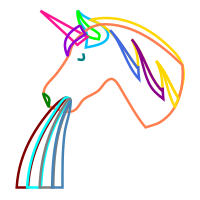

In [14]:
svg.draw_colored()

## Rotation and grid displaying

Here is a code sample showing how one can duplicate an existing icon, rotate it and display both icons side-by-side.

In [15]:
clock = SVG.load_svg("docs/imgs/clock.svg")
clock2 = clock.copy().rotate(Angle(45))
clock3 = clock.copy().rotate(Angle(90))

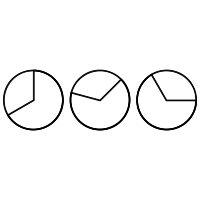

In [16]:
make_grid([clock, clock2, clock3]).draw()

## Manipulating individual paths

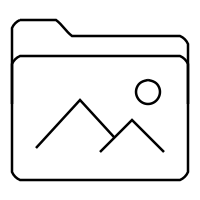

In [17]:
canvas = SVG.load_svg("docs/imgs/canvas.svg")
canvas.draw()

Let us scale the mountain on the right and translate the sun to the left.

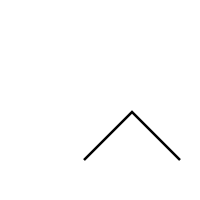

In [18]:
mountain2 = canvas[4]
center = mountain2.bbox().center
mountain2.translate(-center).scale(1.5).translate(center).draw()

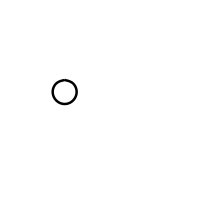

In [19]:
sun = canvas[1]
sun.translate(Point(-10, 0)).draw()

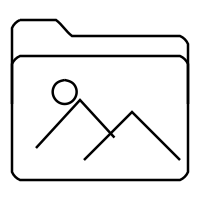

In [20]:
canvas.draw()

## Conversion to PyTorch tensor-format

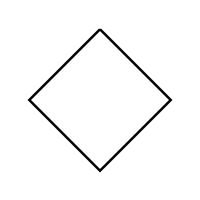

In [23]:
square = SVG.unit_square().normalize().zoom(0.5).rotate(Angle(45))
square.draw()

In [24]:
t = square.copy().numericalize().to_tensor()
t

group_len: 1


tensor([[  0.,  -1.,  -1.,  -1.,  -1.,  -1., 128.,  37.,  -1.,  -1.,  -1.,  -1.,
         128.,  37.],
        [  1.,  -1.,  -1.,  -1.,  -1.,  -1., 128.,  37.,  -1.,  -1.,  -1.,  -1.,
         219., 128.],
        [  1.,  -1.,  -1.,  -1.,  -1.,  -1., 219., 128.,  -1.,  -1.,  -1.,  -1.,
         128., 219.],
        [  1.,  -1.,  -1.,  -1.,  -1.,  -1., 128., 219.,  -1.,  -1.,  -1.,  -1.,
          37., 128.],
        [  1.,  -1.,  -1.,  -1.,  -1.,  -1.,  37., 128.,  -1.,  -1.,  -1.,  -1.,
         128.,  37.]])

`to_tensor` converts the `SVG` instance to a PyTorch tensor of shape $N_C \times (1 + 13)$, representing the $N_C$ commands that constitute the SVG path. If the SVG has more than one path, commands will either be concatenated or `to_tensor` will output a list of tensors.
- the first row represents the command type (`m`, `l`, `c`, `a`, `EOS`, `SOS` or `z`)
- the 13 subsequent rows represent respectively: $r_x$, $r_y$, $\varphi$, $f_A$, $f_S$, $x_1$, $y_1$, $q_{x1}$, $q_{y1}$, $q_{x2}$, $q_{y2}$, $x_2$ and $y_2$. Note that the first 5 rows are for a potential future compatiblity with elliptical arc commands, but aren't used in general.

As described in the paper, unused arguments are encoded as -1.

After numericalization, coordinates are between 0 and 255.

In [25]:
from deepsvg.difflib.tensor import SVGTensor
tensor = SVGTensor.from_data(t)

`SVGTensor` is a wrapper around this PyTorch raw data, and allows for easy padding/EOS/SOS processing as well as differentiable sampling of points along the path contours. More details in the `notebooks/svgtensor.ipynb` notebook!